In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine,inspect, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///./Resources/hawaii.sqlite")

In [5]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [6]:
# reflect an existing database into a new model
Base= automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station=Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
latest = session.query(Measurement.date).order_by(Measurement.date).first()
print(f'Most recent date:{recent} the latest date:{latest}')

Most recent date:('2017-08-23',) the latest date:('2010-01-01',)


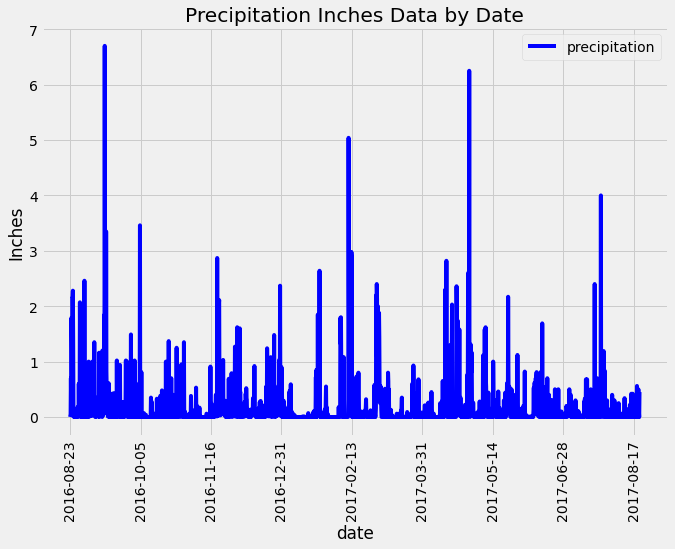

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_dt=dt.datetime.strptime(recent[0], "%Y-%m-%d")
# Calculate the date one year from the last date in data set.
recent_dt12mo=dt.date(recent_dt.year-1,recent_dt.month,recent_dt.day)
# Perform a query to retrieve the data and precipitation scores
sel=[Measurement.date,Measurement.prcp]
date_prcp_res=session.query(*sel).filter(Measurement.date>=recent_dt12mo).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
date_prcp_DF=pd.DataFrame(date_prcp_res, columns=["date","precipitation"])
#clean up NAN values 
date_prcp_DF=date_prcp_DF.dropna(how="any")
# Sort the dataframe by date
date_prcp_DF=date_prcp_DF.sort_values(["date"], ascending= True)
date_prcp_DF=date_prcp_DF.set_index("date")
date_prcp_DF.head()
# Use Pandas Plotting with Matplotlib to plot the data
date_prcp_DF.plot(color='blue', rot=90, figsize=(10,7))
plt.ylabel("Inches")
plt.title("Precipitation Inches Data by Date")
plt.savefig("Precipitation Inches Data by Date.png")

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
date_prcp_DF.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset
station_count=session.query(Station.station).count()
print(f'There are a total of {station_count} stations in the dataset.')

There are a total of 9 stations in the dataset.


In [14]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
most_active_stations 

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_temp= session.query(func.min(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()
high_temp= session.query(func.max(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()
avg_temp= session.query(func.avg(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()
print(f'For station USC00519281: lowest temp ={lowest_temp}, highest temp={high_temp}, and the average={avg_temp}.')

For station USC00519281: lowest temp =[(54.0,)], highest temp=[(85.0,)], and the average=[(71.66378066378067,)].


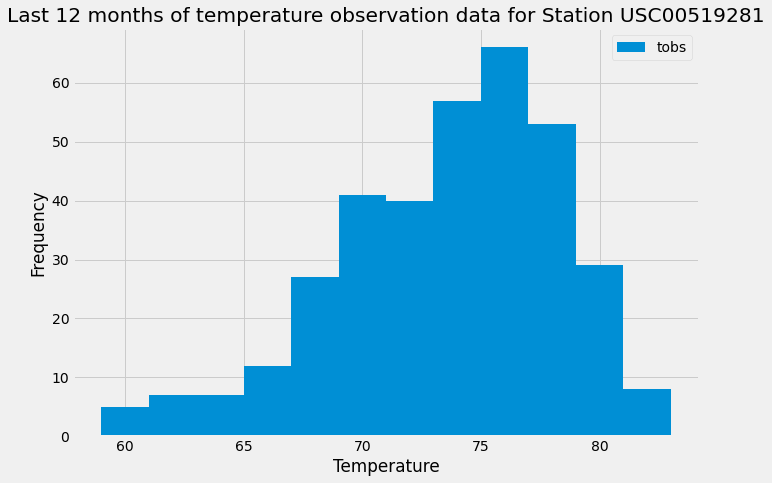

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
sel=[Measurement.date,Measurement.tobs]
date_tobs_res=session.query(*sel).filter(Measurement.date>=recent_dt12mo).filter(Measurement.station=='USC00519281').all()
date_tobs_DF=pd.DataFrame(date_tobs_res, columns=["date","tobs"])
date_tobs_DF.plot.hist(bins=12,figsize=(10,7))
plt.xlabel("Temperature")
plt.title("Last 12 months of temperature observation data for Station USC00519281")
plt.savefig("Last 12 months of temperature observation data for Station USC00519281")

# Close session

In [17]:
# Close Session
session.close()